<a href="https://colab.research.google.com/github/Jawad-Flahi/Risk-factors-of-Diabetes/blob/main/diabities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Risk factors of Diabetes and Interpreting Cluster Feature Importance 

In [64]:
pip install shap

     |████████████████████████████████| 564 kB 5.2 MB/s 


In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import shap
from sklearn.metrics import precision_score,accuracy_score
random.seed(6)


In [2]:
df = pd.read_csv('/content/diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df[df['Age'] == 81]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
459,9,134,74,33,60,25.9,0.46,81,0


Conclusion :<br> Minimum values for Skinthickness,BloodPressure ,Insulin  and BMI are 0 which is midically impossible<br>
So will fill all these 0's with np.nan and replace with them with suitable values

In [6]:
df_copy = df.copy()


In [7]:
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']

In [8]:
df_copy[cols] = df_copy[cols].replace(0,np.NaN)

In [9]:
df[(df["BloodPressure"]==0) & (df['SkinThickness']==0) & (df['BMI'] == 0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
706,10,115,0,0,0,0.0,0.261,30,1


In [10]:
sub_df1 = df[df.Pregnancies>=6]

In [11]:
sub_df1.shape

(219, 9)

In [12]:
sub_df1.Outcome.value_counts()

1    111
0    108
Name: Outcome, dtype: int64

In [13]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


All variables are numeric

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f30ce11ca50>,
      dtype=object)

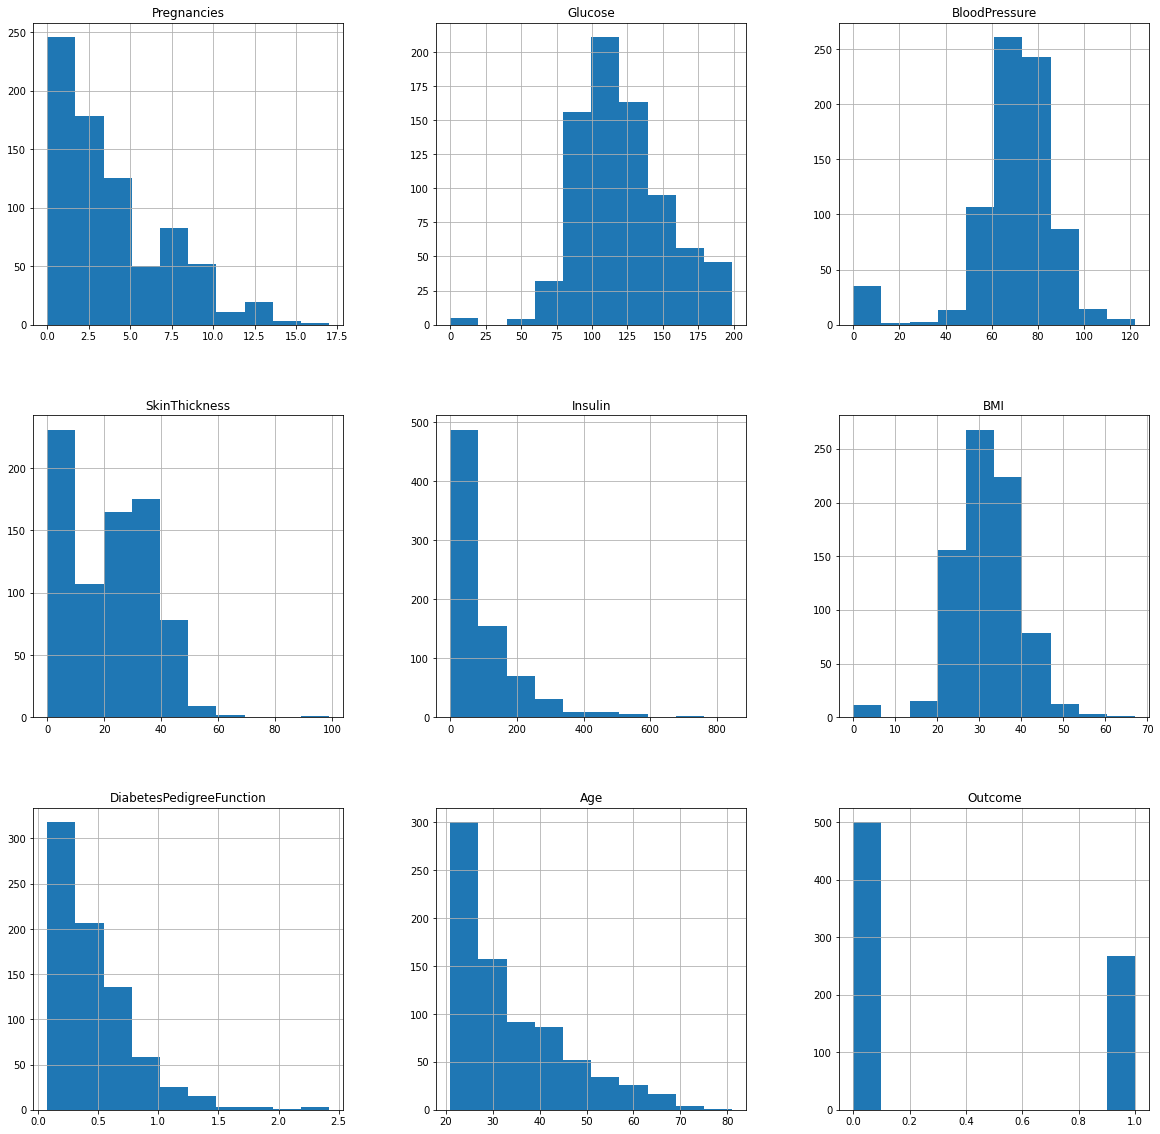

In [14]:
 df.hist(figsize = (20,20))

In [15]:
df_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

No null values

In [16]:
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(),inplace =True)
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(),inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].median(),inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(),inplace=True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(),inplace=True)

In [17]:
df_copy.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

[500 268]


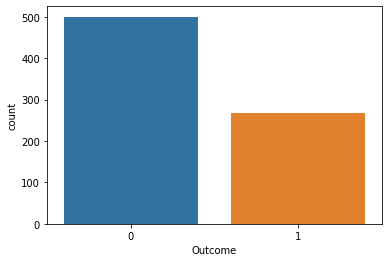

In [18]:
print(df_copy.Outcome.value_counts().unique())
sns.countplot(x =df['Outcome'])

500 dont have diabities and 268 have

In [19]:
X=df_copy.iloc[:,:-1]
y = df_copy.iloc[:,-1]

In [20]:
X.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

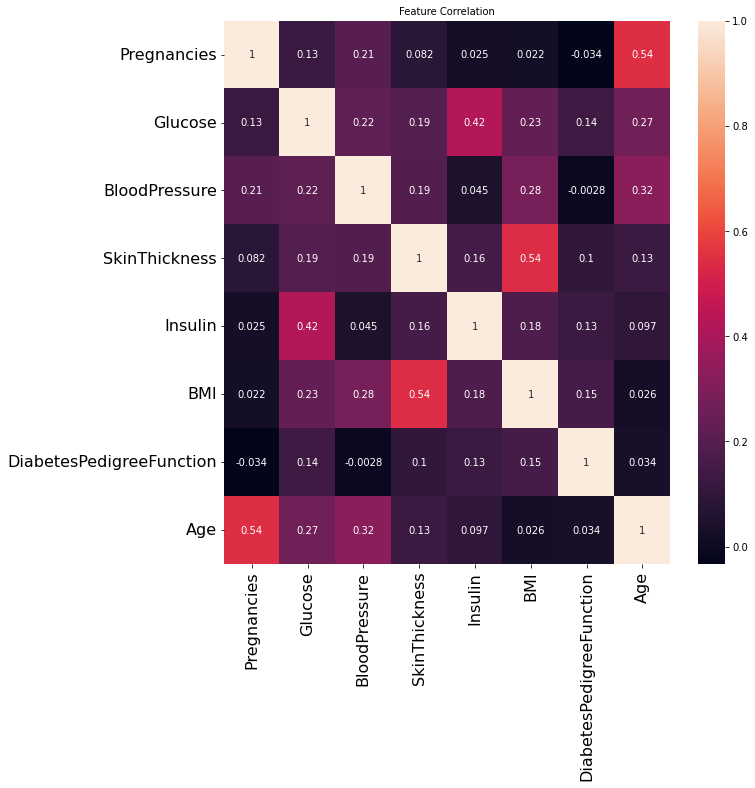

In [21]:
ax = plt.figure(figsize=(10,10))
ax = sns.heatmap(X.corr(),cmap="rocket",annot=True)
ax.set_title('Feature Correlation',fontsize=10)
ax.yaxis.set_tick_params(labelsize= 16)
ax.xaxis.set_tick_params(labelsize= 16)
plt.show()

Observation:<br>
Postive relationship between: <br>
1) Pregnancies and Age<br>
2 SkinThickness and BMI<br>
3) Insulin and Glucose<br>


### Scaling the data

In [22]:
from sklearn.preprocessing import RobustScaler # Data set comtains few oultliers

In [23]:
scale = RobustScaler()

In [24]:
X_scaled = scale.fit_transform(X)

In [25]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [26]:
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

In [27]:
X_scaled_df = pd.DataFrame(X_scaled,columns=cols)

In [28]:
X_scaled_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.30, random_state=42)

### Selecting the best features 

We will select the best features which contribute most by configuring RFE with algorithm for classification

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

In [32]:
rfe = RFE(estimator=RandomForestClassifier())
clf = RandomForestClassifier()


In [33]:
clf.fit(X_train, y_train)

score = clf.score(X_train, y_train)
print('Train',score) 

score = clf.score(X_test,y_test)
print('Test',score) 

Train 1.0
Test 0.7532467532467533


In [34]:
importances = clf.feature_importances_
print(importances)
print(sum(importances))
sort = sorted(importances, reverse=True)
print(sort)

[0.07305693 0.27873791 0.08385493 0.07133291 0.0793703  0.1608717
 0.11052066 0.14225465]
0.9999999999999998
[0.2787379120718334, 0.16087169543461957, 0.1422546491528906, 0.11052065830248381, 0.08385493471268149, 0.07937030429982407, 0.07305693236468927, 0.07133291366097773]


In [35]:
y_pred = clf.predict(X_test)
print("Precision score:")
print(round(precision_score(y_test, y_pred, average='binary'), 3))
print("\nAccuracy score:")
print(round(accuracy_score(y_test, y_pred), 4))

Precision score:
0.635

Accuracy score:
0.7532


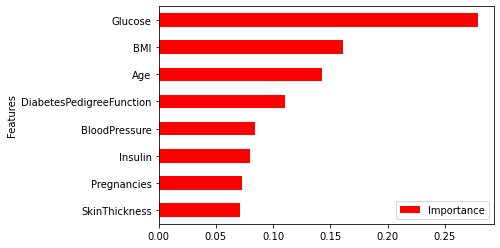

In [36]:
important_features = pd.DataFrame({'Features':X_scaled_df.columns,'Importance':np.round(clf.feature_importances_,4)}).sort_values('Importance',ascending=True)
important_features.plot(x='Features',y='Importance',kind='barh',color = 'r');

In [37]:
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

In [38]:
cols = X_train.columns

In [39]:
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, cols[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature Glucose (0.278738)
2. feature BMI (0.160872)
3. feature Age (0.142255)
4. feature DiabetesPedigreeFunction (0.110521)
5. feature BloodPressure (0.083855)
6. feature Insulin (0.079370)
7. feature Pregnancies (0.073057)
8. feature SkinThickness (0.071333)


In [40]:
rfe.fit(X_train,y_train)

RFE(estimator=RandomForestClassifier())

In [41]:
for i in range(X_train.shape[1]):
  print('Column: %s, Selected=%s, Rank: %d' % (cols[i], rfe.support_[i], rfe.ranking_[i]))


Column: Pregnancies, Selected=False, Rank: 5
Column: Glucose, Selected=True, Rank: 1
Column: BloodPressure, Selected=False, Rank: 3
Column: SkinThickness, Selected=False, Rank: 4
Column: Insulin, Selected=False, Rank: 2
Column: BMI, Selected=True, Rank: 1
Column: DiabetesPedigreeFunction, Selected=True, Rank: 1
Column: Age, Selected=True, Rank: 1


In [42]:
score = rfe.score(X_train, y_train)
print('Train',score) 

score = rfe.score(X_test,y_test)
print('Test',score) 

Train 1.0
Test 0.7532467532467533


In [43]:
y_pred2 = rfe.predict(X_test)
print("Precision score:")
print(round(precision_score(y_test, y_pred2, average='binary'), 3))
print("\nAccuracy score:")
print(round(accuracy_score(y_test, y_pred2), 4))

Precision score:
0.632

Accuracy score:
0.7532


After selecting 4(Glucose,BMI,DiabetesPedigreeFunction,Age) columns out of 8 we got only got 2 percent  decrease in accuracy and 5 percent decrease in precision<br>


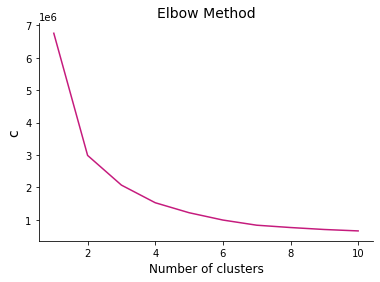

In [44]:
from sklearn.cluster import KMeans
c = []
for i in range(1,11):
    km = KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    c.append(km.inertia_)
plt.plot(range(1,11),c, c="#c51b7d")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Elbow Method', size=14)
plt.xlabel('Number of clusters', size=12)
plt.ylabel('c', size=14)
plt.show() 

In [45]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [46]:
n_clusters = [2, 3, 4, 5, 6]
for n_clusters in n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )


For n_clusters = 2 The average silhouette_score is : 0.7249817589917965
For n_clusters = 3 The average silhouette_score is : 0.5202728349171528
For n_clusters = 4 The average silhouette_score is : 0.39142340430239325
For n_clusters = 5 The average silhouette_score is : 0.3451386614748592
For n_clusters = 6 The average silhouette_score is : 0.35318550447309655


In [47]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=10, n_init=10, random_state=0)
# Fit and predict 
label = kmeans.fit_predict(X)

In [48]:
print(label)


[0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 1 0 0 0 0 0 

In [49]:
cluster1 = X[label == 0]

In [50]:
cluster2 = X[label == 1]


In [51]:
cluster3 = X[label==2]

In [52]:
cluster3

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age


In [53]:
features = df.columns.tolist()[0:-1]

In [54]:
features

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [55]:
centroids = kmeans.cluster_centers_
print(f"Centroids \n{centroids}")


Centroids 
[[  3.86376404 118.93319356  72.43143462  28.91853933 121.21488764
   32.21755618   0.46336798  33.20224719]
 [  3.60714286 156.69642857  72.07142857  31.51785714 388.05357143
   35.47678571   0.58005357  33.73214286]]


In [56]:
sorted_centroid_features_idx = centroids.argsort(axis=1)[:,::-1]
print(f"Sorted Feature/Dimension Indexes for Each Centroid in Descending Order: \n{sorted_centroid_features_idx}")

print()

sorted_centroid_features_values = np.take_along_axis(centroids, sorted_centroid_features_idx, axis=1)
print(f"Sorted Feature/Dimension Values for Each Centroid in Descending Order: \n{sorted_centroid_features_values}")


Sorted Feature/Dimension Indexes for Each Centroid in Descending Order: 
[[4 1 2 7 5 3 0 6]
 [4 1 2 5 7 3 0 6]]

Sorted Feature/Dimension Values for Each Centroid in Descending Order: 
[[121.21488764 118.93319356  72.43143462  33.20224719  32.21755618
   28.91853933   3.86376404   0.46336798]
 [388.05357143 156.69642857  72.07142857  35.47678571  33.73214286
   31.51785714   3.60714286   0.58005357]]


In [57]:
sorted_centroid_features_idx[0]

array([4, 1, 2, 7, 5, 3, 0, 6])

In [58]:
centroids[0][0]

3.86376404494382

In [59]:
sorted_centroid_features_values[0]

array([121.21488764, 118.93319356,  72.43143462,  33.20224719,
        32.21755618,  28.91853933,   3.86376404,   0.46336798])

In [60]:
first_features_in_centroid_1 = centroids[0][sorted_centroid_features_idx[0]]
print(list(
        zip(
            [features[feature] for feature in sorted_centroid_features_idx[0]], 
            first_features_in_centroid_1
        )
    ))
    

[('Insulin', 121.21488764044943), ('Glucose', 118.93319355883779), ('BloodPressure', 72.43143461532566), ('Age', 33.20224719101124), ('BMI', 32.21755617977528), ('SkinThickness', 28.918539325842698), ('Pregnancies', 3.86376404494382), ('DiabetesPedigreeFunction', 0.4633679775280899)]


In [63]:
first_features_in_centroid_2 = centroids[1][sorted_centroid_features_idx[1]]
print(list(
        zip(
            [features[feature] for feature in sorted_centroid_features_idx[1]], 
            first_features_in_centroid_2
        )
    ))

[('Insulin', 388.05357142857144), ('Glucose', 156.69642857142856), ('BloodPressure', 72.07142857142857), ('BMI', 35.47678571428571), ('Age', 33.73214285714286), ('SkinThickness', 31.517857142857142), ('Pregnancies', 3.6071428571428568), ('DiabetesPedigreeFunction', 0.5800535714285714)]


In [67]:
label.shape

(768,)

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
y = label

In [73]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47


In [100]:
from sklearn.ensemble import RandomForestClassifier

In [101]:
clf = RandomForestClassifier()

In [78]:
X_scaled_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.6,0.765432,-0.012662,0.857143,0.000000,0.142857,0.665359,1.235294
1,-0.4,-0.790123,-0.387662,0.000000,0.000000,-0.626374,-0.056209,0.117647
2,1.0,1.629630,-0.512662,0.000000,0.000000,-0.989011,0.783007,0.176471
3,-0.4,-0.691358,-0.387662,-0.857143,-5.391304,-0.461538,-0.537255,-0.470588
4,-0.6,0.493827,-2.012662,0.857143,7.478261,1.186813,5.007843,0.235294
...,...,...,...,...,...,...,...,...
763,1.4,-0.395062,0.237338,2.714286,9.565217,0.065934,-0.526797,2.000000
764,-0.2,0.123457,-0.137662,-0.285714,0.000000,0.494505,-0.084967,-0.117647
765,0.4,0.098765,-0.012662,-0.857143,-2.260870,-0.670330,-0.333333,0.058824
766,-0.4,0.222222,-0.762662,0.000000,0.000000,-0.241758,-0.061438,1.058824


In [90]:
print("Model coefficients:\n")
for i in range(X_scaled_df.shape[1]):
    print(X_scaled_df.columns[i], "=", l_model.coef_[0][i].round(4))

Model coefficients:

Pregnancies = -0.4839
Glucose = 0.7664
BloodPressure = 0.0266
SkinThickness = 0.137
Insulin = 1.2842
BMI = -0.0017
DiabetesPedigreeFunction = 0.0525
Age = -0.148


In [103]:
clf.fit(X_scaled_df,y)

RandomForestClassifier()

In [107]:
explainer= shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_scaled_df)

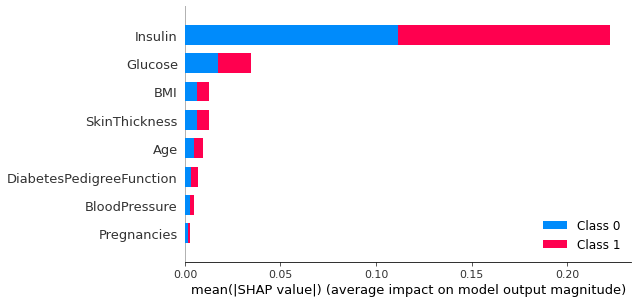

In [108]:
fig = shap.summary_plot(shap_values, X_scaled_df, show=False)